This is for submission of Tsne assignment on Amazon Fine food Reviews!


By: Madhusudan Chandak


Data : Amazon Fine Food Reviews
  
Using preprocessed data after removal of duplication etc.
Using less amount of data as per the processing capabilities of the system.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#reading preprocessed data
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3 limit 10000""", conn)
    conn.close()
else:
    print("Please the above cell")

In [3]:

print(final['CleanedText'].values)

['witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open'
 'fun way children learn month year learn poem throughout school year like handmot invent poem'
 ...
 'tri product yet could give star ship fast look like nice packag pepper like idea smaller pkgs big can easier take camp'
 'make good addit earthquak desast stock easi use keep long time'
 'like flavor jalapeno job clean perfect product add zing soup picant sauc chip dip price excel ship fast last like compani mani thing use regualr basi need bunch jar frig produc go bad use way']


In [6]:
#Using BOW
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['CleanedText'].values)
print("the shape of out text BOW vectorizer ",final_counts.get_shape())

with open('BOWfinal_counts.pkl', 'wb') as f:
    pickle.dump(final_counts, f)


the shape of out text BOW vectorizer  (10000, 14388)


In [7]:
with open('BOWfinal_counts.pkl', 'rb') as f:
    final_counts = pickle.load(f)
    
print(final['Score'].values)
Bowtext=final_counts
BowScore=final['Score']
final_counts.shape

['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


(10000, 14388)

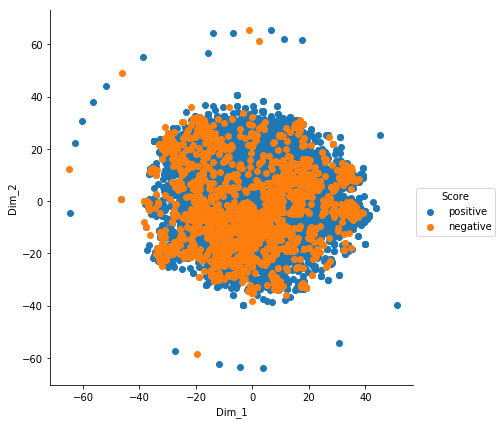

In [9]:
#Plotting TSNE on BOW for Amazon Fine Food Reviews
import seaborn as sn
from sklearn.manifold import TSNE

# Picking the top 10000 points
data_10000 = Bowtext[0:10000,:]
Score_10000 = BowScore[0:10000]
data_10000 = data_10000.todense()

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(data_10000)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Score_10000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [8]:
#Vectorising using bigrams
databigrams = final['CleanedText'].values[0:5000]
count_vect = CountVectorizer(ngram_range=(1,2) )
final_bigram_counts = count_vect.fit_transform(databigrams)
print("the shape of out text BOW vectorizer using bigrams",final_bigram_counts.get_shape())

Bowtext=final_bigram_counts
BowScore=BowScore[0:5000]
final_bigram_counts.shape

the shape of out text BOW vectorizer using bigrams (5000, 152447)


(5000, 152447)

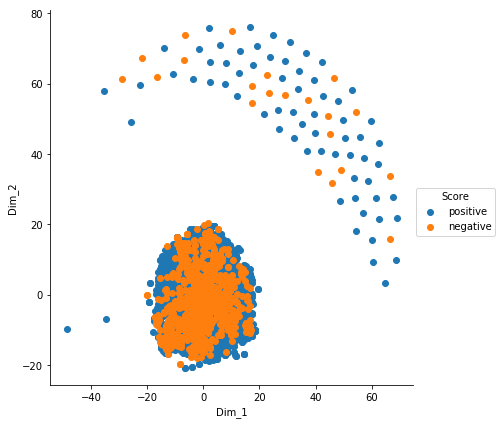

In [11]:
#Plotting TSNE on Bigrams
import seaborn as sn
from sklearn.manifold import TSNE

data_5000 = Bowtext[0:5000,:]
Score_5000 = BowScore[0:5000]
data_5000 = data_5000.todense()

model = TSNE(n_components=2, random_state=0)


tsne_data = model.fit_transform(data_5000)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Score_5000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [4]:
#TF IDF Vectorizing
datatfidf = final['CleanedText'].values[0:4000]
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(datatfidf)
print("the shape of out text TFIDF vectorizer using bigrams",final_tf_idf.get_shape())

Bowtext=final_tf_idf
BowScore=final['Score'].values[0:4000]



the shape of out text TFIDF vectorizer using bigrams (4000, 9492)


Model Bi Grams


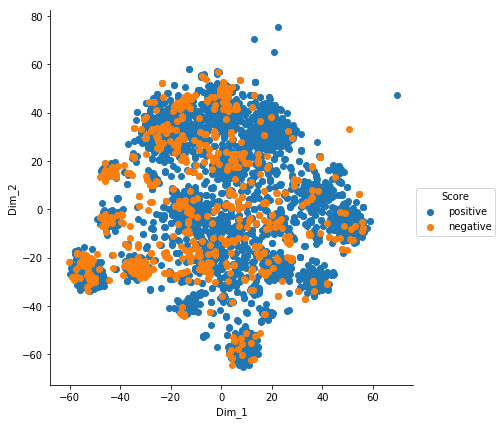

In [6]:
#Plotting TSNE on TF-IDF
import seaborn as sn
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
data_4000 = Bowtext
Score_4000 = final['Score'].values[0:4000]
data_4000 = data_4000.toarray()
tsne_data = model.fit_transform(data_4000)

#print("Model Bi Grams")
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Score_4000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [7]:
#WORD TO VECTOR
datawtov = final['CleanedText'].values[0:4000]
i=0
list_of_sent=[]
for sent in datawtov:
    list_of_sent.append(sent.split())

In [8]:
print(datawtov[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [9]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [10]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  3264
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'hes', 'learn', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'movi', 'howev', 'miss', 'hard', 'cover', 'version', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep', 'page', 'open', 'fun', 'way', 'children', 'month', 'year']


In [11]:
#Plotting TSNE on W2V
sent_vectors = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors.append(sent_vec)
print(len(sent_vectors))




100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:02<00:00, 1360.46it/s]


4000


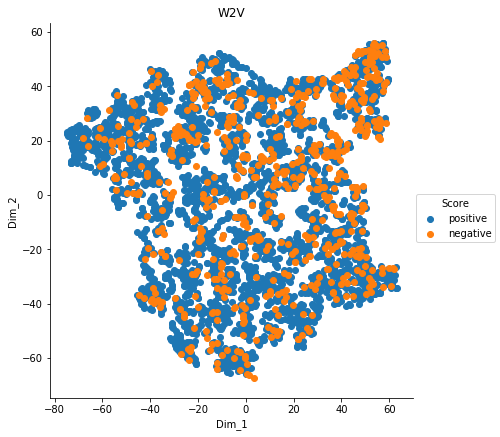

In [19]:
import seaborn as sn
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(sent_vectors)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Score_4000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("W2V")
plt.show()

In [13]:
#Average W2V
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))


100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:02<00:00, 1388.00it/s]


4000


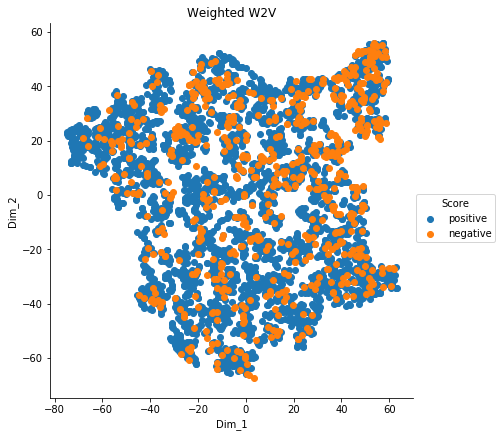

In [18]:
#Plotting TSNE on Average W2V
import seaborn as sn
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(sent_vectors)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Score_4000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("Weighted W2V")
plt.show()

In [15]:
#TFIDF for W2V
datatfidf = final['CleanedText'].values[0:4000]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidf)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [16]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:03<00:00, 1020.04it/s]


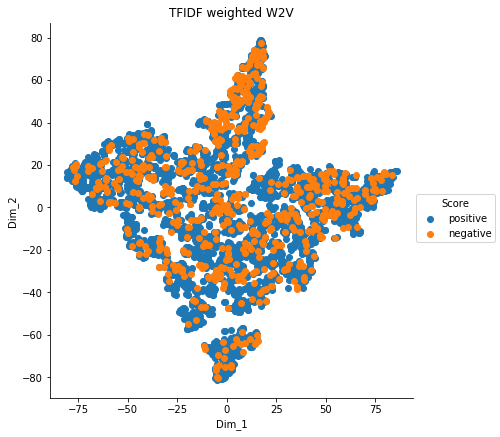

In [17]:
#Plotting TSNE on TFIDF Weighted W2V
import seaborn as sn
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(tfidf_sent_vectors)

# creating a new data frame which help us in plotingthe result data
tsne_data = np.vstack((tsne_data.T, Score_4000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TFIDF weighted W2V")
plt.show()